# Project Introduction

#### Table of Contents
- [1. League of Legends Overview](###League-of-Legends-Overview)
  - [How it's played](#####How-it's-played)
  - [Complexity and META](#####Complexity-and-META)
  - [The Competitive Scene](#####The-Competitive-Scene)
- [2. Project Objective](###Project-Objective)
- [3. Basic EDA](#Basic-EDA)
  - [i. About the Dataset](###About-the-Dataset)
  - [ii. Exploring the Dataset](###Exploring-the-Dataset)   
    - [Red Team vs Blue Team](#####Red-vs-Blue)
    - [Choosing Variables](#####Choosing-Variables)

### League of Legends Overview

<p align="center">
  <img src="Cover.jpg" alt="Cover art" style="width: 100%; height: 100%;">
</p>

League of Legends (LoL) is one of the world’s most popular multiplayer online battle arena (MOBA) game, developed by Riot Games. It features a team-based competitive game mode based on strategy and outplaying opponents. The game features two teams of five players, each controlling a champion with unique abilities and strengths. The objective of the game is to destroy the enemy team's Nexus, a structure located in their base, while defending their own.

##### How it's played
Each team assigns their players to different areas of <span style="color:green">Summoner’s Rift</span>, the most commonly used map in League of Legends, to face off against an opponent and attempt to gain control for their team. As the game progresses, players complete a variety of tasks, including <span style="color:red">killing computer-controlled minions</span> , <span style="color:red">removing turrets</span> (which protect eachteam’s side of the map respectively), and <span style="color:red">eliminating champions</span> (player-controlled characters). Players use the <span style="color:gold">gold</span> they earn from these objectives to power up their champion and increase their teams control of the game. When a team is able to use those advantages to move into the enemy team’s base and break the <span style="color:cyan">Nexus</span>, they secure the victory.

<p align="center">
  <img src="Lanes.webp" alt="Summoner's Rift" style="width: 60%; height: 60%;">
</p>

##### Complexity and META
League of Legends is a highly complex multiplayer online battle arena (MOBA) game with various game mechanics, including strategy, teamwork, communication, and quick decision-making.
As of 3/17/2023 the game features 163 unique champions and each of them has their own abilities, strengths and weaknesses. On top of this, the game also has a large variety of items, runes and materies for the player to use every game. This large variety of attributes allows the game to be highly customisable and allows players to always develop unique strategies and the most effective tactics available (META) as time progresses. In addition, the developer also pushes out regular patches that can weaken or strengthen certain champions or items which can shift the META considerably.  

##### The Competitive Scene
The highly competitive and widely recognized eSport of League of Legends is considered a significant contributor to the legitimacy of the industry, with an extensive global following. Riot Games oversees the organization of the League Championship Series (LCS) and the League of Legends European Championship (LEC) in North America and Europe, respectively. These events consist of ten professional teams each and take place in Los Angeles and Berlin. Corresponding regional competitions are also held in other regions such as China's LPL and South Korea's LCK. These regional competitions culminate in the highly anticipated annual World Championship event.

### Project Objective
We aim to be able to predict the outcome of any particular match using combination of various predictor variables such as gold diff, baron kill, game duration, etc


---
# Basic EDA

### Import Essential libraries

Nothing special, just importing some essential Python Libraries
> NumPy : Library for Numeric Computations in Python   
> Pandas : Library for Data Acquisition and Preparation   
> Matplotlib : Low-level library for Data Visualisation   
> Seaborn : Higher-level library for Data Visualisation   

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval

---
### About the Dataset
We will be analysing the dataset sourced from Kaggle, [here](https://www.kaggle.com/datasets/chuckephron/leagueoflegends?select=LeagueofLegends.csv). Let's first take a look at all the available columns that is documented in the file `_columns.csv`. It consists of names of all the columns and its description.

In [49]:
columns = pd.read_csv("_columns.csv")
print("Shape of columns: ", columns.shape)
columns

Shape of columns:  (57, 2)


,ColumnName,ColumnDescription
0,Address,website address the data is scraped from \n
1,League,League or Tournament the match took place in \n
2,Year,Year the match took place in \n
3,Season,Spring or Summer depending on which half of th...
4,Type,"Season, Playoffs, Regional, or International m..."
5,blueTeamTag,Blue Team's tag name (ex. Team SoloMid is TSM...
6,bResult,Result of the match for Blue Team - 1 is a wi...
7,rResult,Result of the match for Red Team - 1 is a win...
8,redTeamTag,Red Team's Tag Name (ex. Team SoloMid is TSM) \n
9,gamelength,Game length in minutes \n


Now lets take a look at the dataset. We can see that there is 57 columns which matches with `_columns.csv`

In [50]:
# Import Dataset
league_data = pd.read_csv("LeagueofLegends.csv")

# Shape of Dataset
print("Data dims: ", league_data.shape)

# Sneakpeak of Dataset
league_data.head()

Data dims:  (7620, 57)


,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


In [51]:
# Information about the variables
league_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   League            7620 non-null   object
 1   Year              7620 non-null   int64 
 2   Season            7620 non-null   object
 3   Type              7620 non-null   object
 4   blueTeamTag       7582 non-null   object
 5   bResult           7620 non-null   int64 
 6   rResult           7620 non-null   int64 
 7   redTeamTag        7583 non-null   object
 8   gamelength        7620 non-null   int64 
 9   golddiff          7620 non-null   object
 10  goldblue          7620 non-null   object
 11  bKills            7620 non-null   object
 12  bTowers           7620 non-null   object
 13  bInhibs           7620 non-null   object
 14  bDragons          7620 non-null   object
 15  bBarons           7620 non-null   object
 16  bHeralds          7620 non-null   object
 17  goldred       

We can see that the Dataset consist of matches from CBLoL, CLS, EULCS, IEM, LCK, LCL, LJL, LLN, LMS, MSI, NALCS, OPL, RR, TCL as well as World Championships (WC). From year 2014 to 2018. Majority of data falls within 2015 to 2018.

['NALCS' 'EULCS' 'LCK' 'LMS' 'CBLoL' 'TCL' 'OPL' 'CLS' 'LLN' 'LJL' 'LCL'
 'WC' 'MSI' 'IEM' 'RR']
[2015 2016 2017 2014 2018]


<Axes: xlabel='Year', ylabel='count'>

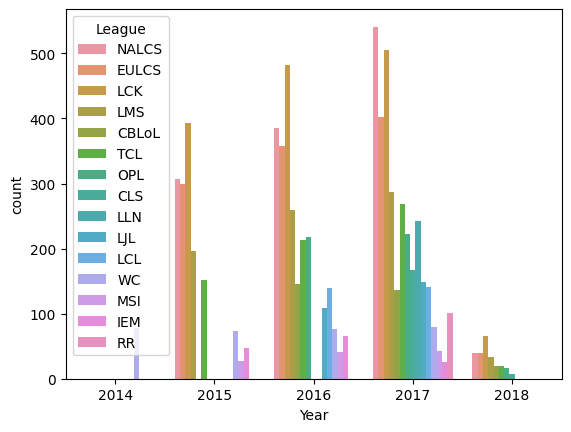

In [52]:
df = pd.DataFrame(league_data[["League", "Year"]])
print(df["League"].unique())
print(df["Year"].unique())

# count plot
sns.countplot(data=league_data, x='Year', hue='League')

---
### Exploring the Dataset
Now lets look into some variables and how we can interpret them in the context of the game

##### <span style='color:red'>Red Team</span> vs <span style='color:cyan'>Blue Team</span>
We can see that in general, there is a bias towards Blue team for winning. This can actually be explained by game design.
1. **Pick order rules** - Blue team has the rights to pick champion first. this is especially important in competitive matches as having the first pick is advantages since this could mean securing a champion that is considerably strong in the current META.   
2. **Ganking Advantage** -  Ganks are when players from other lanes roam to assist another lane. And due to the map design, Blue side top lanes are much safer from ganks as compared to the Red side and this can significantly impact the win rate of top lanes in general.
3. **Camera Angle & HUD positioning** - Due to the way the HUD is positioned and the screen perspective in League of Legends, it is much easier to dodge skillshots on blue side, especially in the bottom lane. If you are shoved into tower on red side, positioning the camera to easily see everything you need to pay attention to is difficult. The minimap, your champion stats and your item box all cover up small portions of the Rift that appear to be even more annoying when you are playing on red side. 
4. **Objectives positioning** - Positioning of objectives such as Dragon and Rift Harold is much more favorable to the Blue side. This allow the Blue team to have significant advantages early game and this effect could snowball.

So, perhaps we need to take into account of this during our analysis.

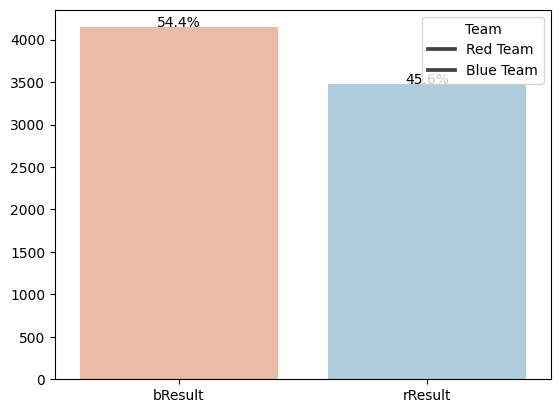

In [53]:
win_df = pd.DataFrame(league_data[['rResult', 'bResult']])

# filter the data to only include rows where value=1
data_filtered = pd.melt(win_df, var_name='Team', value_name='Win').query('Win == 1')

# count the number of occurrences of each team in the filtered dataframe
counts = data_filtered['Team'].value_counts()

# create the bar plot
ax = sns.barplot(x=counts.index, y=counts.values, palette='RdBu')

# set the legend labels
ax.legend(title='Team', labels=['Red Team', 'Blue Team'])

# add percentage labels to the bars
total = len(data_filtered)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total)
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 2, s=percentage, ha='center')

# show the plot
plt.show()

As we can see, it is quite troublesome to work with `bResult` and `rResult` to tell who won for each match.   
Now lets create a new column `winner` with `1` if <span style="color:cyan">blue</span> team won and `2` if <span style="color:red">red</span> team won. This way it is easier for us to compare other variables to who won.

In [54]:
# Make a copy of df to work with
clean_df = league_data.copy(deep=True)

# Make a new column to show winners
clean_df['winner'] = np.where(clean_df['bResult'] == 1, 1, 2)
print(clean_df['winner'].value_counts())

1    4146
2    3474
Name: winner, dtype: int64


##### Choosing Variables
Objectives can be a good predictor of outcome of games.   
Now lets choose some columns that seems to be important factor to a game's outcome to do analysis on:
* `blueTeamTag` <span style='color:cyan'>Blue</span> team's tag name (e.g. Team SoloMid is TSM)
* `goldblue`    <span style='color:cyan'>Blue</span> Team's total <span style='color:gold'>gold</span> value by minute
* `bKills`	    List of <span style='color:cyan'>Blue</span> Team's kills - [Time in minutes, Victim, Killer, Assist1, Assist2, Assist3, Assist4, x_pos, y_pos]
* `bTowers`     List of minutes that <span style='color:cyan'>Blue</span> Team destroyed a tower and Tower Location
* `bInhibs`     List of minutes that <span style='color:cyan'>Blue</span> Team destroyed an inhibitor and Location
* `bDragons`    List of minutes that <span style='color:cyan'>Blue</span> Team killed a dragon
* `bBarons`     List of minutes that <span style='color:cyan'>Blue</span> Team killed a baron
* `bHeralds`    List of minutes that <span style='color:cyan'>Blue</span> Team killed a rift herald

* `redTeamTag`  <span style='color:red'>Red</span> team's tag name   
* `goldred`	    <span style='color:red'>Red</span> Team's total gold value by minute
* `rKills`	    List of <span style='color:red'>Red</span> Team's kills
* `rTowers`     List of minutes that <span style='color:red'>Red</span> Team destroyed a tower and Tower location
* `rInhibs`     List of minutes that <span style='color:red'>Red</span> Team destroyed an inhibitor and Location
* `rDragons`    List of minutes that <span style='color:red'>Red</span> Team killed a dragon
* `rBarons`     List of minutes that <span style='color:red'>Red</span> Team killed a baron
* `rHeralds`    List of minutes that <span style='color:red'>Red</span> Team killed a rift herald

In [55]:
# Convert columns with lists object to real lists
cols = ['bKills', 'rKills', 'goldblue', 'goldred', 'bTowers', 'rTowers', 'bInhibs', 'rInhibs', 'bDragons', 'rDragons', 'bBarons', 'rBarons', 'bHeralds', 'rHeralds']

for col in cols:
    clean_df[col] = clean_df[col].apply(literal_eval)


In [59]:
# make a new df with only columns we are onterested in
# sums up all the variables
new_df = pd.DataFrame()

new_df['blueTeamTag'] = clean_df['blueTeamTag']
new_df['goldbluetotal'] = clean_df['goldblue'].apply(max)
new_df['bKills'] = clean_df['bKills'].apply(len)
new_df['bTowers'] = clean_df['bTowers'].apply(len)
new_df['bDragons'] = clean_df['bDragons'].apply(len)
new_df['bInhibs'] = clean_df['bInhibs'].apply(len)
new_df['bBarons'] = clean_df['bBarons'].apply(len)
new_df['bHeralds'] = clean_df['bHeralds'].apply(len)

new_df['redTeamTag'] = clean_df['redTeamTag']
new_df['goldredtotal'] = clean_df['goldred'].apply(max)
new_df['rKills'] = clean_df['rKills'].apply(len)
new_df['rTowers'] = clean_df['rTowers'].apply(len)
new_df['rDragons'] = clean_df['rDragons'].apply(len)
new_df['rInhibs'] = clean_df['rInhibs'].apply(len)
new_df['rBarons'] = clean_df['rBarons'].apply(len)
new_df['rHeralds'] = clean_df['rHeralds'].apply(len)

new_df['winner'] = clean_df['winner']
new_df = new_df.reset_index(drop=True)

new_df


,blueTeamTag,goldbluetotal,bKills,bTowers,bDragons,bInhibs,bBarons,bHeralds,redTeamTag,goldredtotal,rKills,rTowers,rDragons,rInhibs,rBarons,rHeralds,winner
0,TSM,62729,16,9,1,2,0,0,C9,56672,9,4,3,0,1,0,1
1,CST,57702,10,7,3,0,1,0,DIG,56537,9,7,1,1,0,0,2
2,WFX,70270,22,15,4,4,1,0,GV,56355,8,2,0,0,0,0,1
3,TIP,58612,10,4,0,0,1,0,TL,63119,21,7,4,1,0,0,2
4,CLG,60269,22,8,2,1,1,0,T8,48947,10,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,YC,57580,7,4,0,0,0,0,SUP,65618,16,9,3,1,2,0,2
7616,GAL,69781,8,5,2,0,2,0,DP,70498,18,10,2,2,0,1,2
7617,SIN,34602,5,0,0,0,0,0,DW,52338,13,11,2,3,1,1,2
7618,LGC,68729,16,9,4,1,2,0,TTC,57221,2,3,0,0,0,0,1


<Axes: >

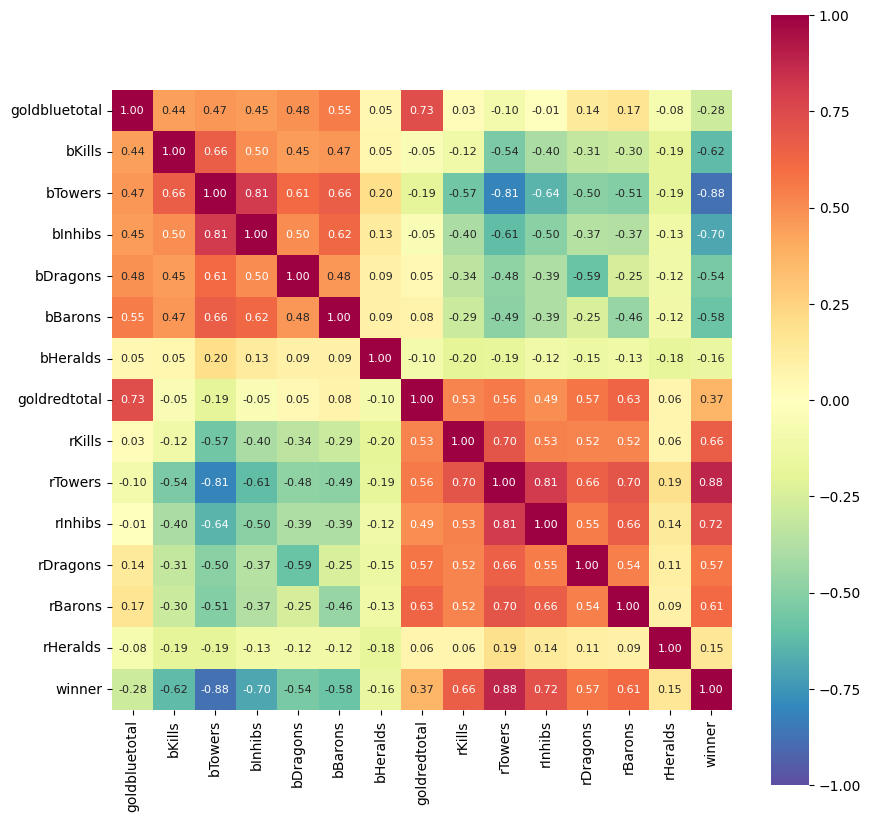

In [103]:
# correlation map of all variables without the team tags
fig = plt.figure(figsize=(10,10))

sns.heatmap(new_df[['goldbluetotal','bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'goldredtotal','rKills', 'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'winner']].corr(),
            vmin=-1, vmax=1,fmt='.2f', annot=True, annot_kws={'size':8}, square=True, cmap='Spectral_r')


Let's choose the top 5 variables ranked by correlation (we can add more later if we want)
- Tower Takedowns: ~0.88
- Inhibitor Takedowns: ~0.72
- Enemies Killed: ~0.66
- Baron Kills: ~0.61
- Dragon Kills: ~0.57

Intepretations of these objectives:
> **Tower Takedowns**: One of the main objectives of this game. Tower kills grants a hefty sum of <span style='color:gold'>gold</span> and also allow the team to have a easier time reaching enemy base.   
>   
> **Inhibitor Takedowns**: Taking down enemy inhibitors allows for ally superminions to spawn, which are significantly stronger variant of minions that can help advance towards enemy base.   
>    
> **Enemies Killed**: Killing an enemy will remove the enemy from game play for a certain amount of time. Allowing allies to take objectives within this window.   
>    
> **Baron Kills**: A side objective in late game. Killing the Baron temporarily grants allies a significant buff to their stats. Hence, giving allies an advantage during team fights.   
>    
> **Dragon Kills**: A side objective in game. Killing the Dragon permanently grants allies a stackable buff depending on the Dragon's type. Arguably one of the most important objective in game.

Note: Surprisingly, gold has lower correlation (~0.37) than the other objectives despite economy managment being one of the more important factor in this gmae.

##### Tower Takedowns